In [41]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [42]:
# read in the data
audible = pd.read_csv(r'C:\Users\User\Documents\kyouth\portfolio\audible_uncleaned.csv')
audible.head()                         #view first row of database

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [43]:
#inspect data type
audible.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [44]:
# check mising value
audible.isna().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [45]:
# clean text from data
audible['author'] = audible['author'].str.replace('Writtenby:', ' ')
audible['narrator'] = audible['narrator'].str.replace('Narratedby:',' ')

# replace Not rated yet with NaN
audible['stars'] = audible['stars'].replace('Not rated yet', 'NaN')
audible

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,NaN,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,NaN,820.00
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,NaN,938.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,NaN,680.00


In [46]:
# extract number of rating stars and rating n_ratings
audible['rating_stars'] = audible['stars'].str.extract('^([\d.]+)')
audible['ratings'] = audible['stars'].str.extract('(\d+) rating')
# drop stars column
audible.drop(columns = ['stars'], axis=1, inplace= True)
audible

,name,author,narrator,time,releasedate,language,price,rating_stars,ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5,34
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,596.00,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,820.00,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,30-12-16,English,938.00,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,680.00,NaN,NaN


In [47]:
# change data type
audible['releasedate']= pd.to_datetime(audible['releasedate'])
audible['price']=audible.price.str.replace(',','')
audible['price']=audible.price.apply(lambda x: 0.0 if x == 'Free' else x)
audible['price'] = audible.price.astype(float)
audible['rating_stars']=audible.rating_stars.astype('category')
audible['ratings']=audible.ratings.astype(float)
audible.info()
audible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   ratings       15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


,name,author,narrator,time,releasedate,language,price,rating_stars,ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,468.0,5,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,820.0,4.5,181.0
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,2017-09-03,English,596.0,NaN,NaN
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,2017-02-21,English,820.0,NaN,NaN
87486,The Innocents Abroad,MarkTwain,FloGibson,19 hrs and 4 mins,2016-12-30,English,938.0,NaN,NaN
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,2011-02-23,English,680.0,NaN,NaN


In [48]:
#extract time to integer
# Replace hrs, mins, and 'Less than 1 minute'
audible['time'] = audible.time.str.replace('hrs', 'hr')
audible['time'] = audible.time.str.replace('mins', 'min')
audible['time'] = audible.time.str.replace('Less than 1 minute', '1 min')
audible[['time']]            #check result

#extract hour
hours = audible['time'].str.extract('(\d+) hr').fillna(0).astype(int)
#extract min
mins = audible['time'].str.extract('(\d+) min').fillna(0).astype(int)

# Combine hours and minutes into the time_mins column
audible['time_in_mins'] = hours * 60 + mins

# Check the results
audible[['time_in_mins']]

,time_in_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


In [49]:
audible.drop(columns=['time'], axis=1,inplace=True)
audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   releasedate   87489 non-null  datetime64[ns]
 4   language      87489 non-null  object        
 5   price         87489 non-null  float64       
 6   rating_stars  15072 non-null  category      
 7   ratings       15072 non-null  float64       
 8   time_in_mins  87489 non-null  int32         
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 5.1+ MB


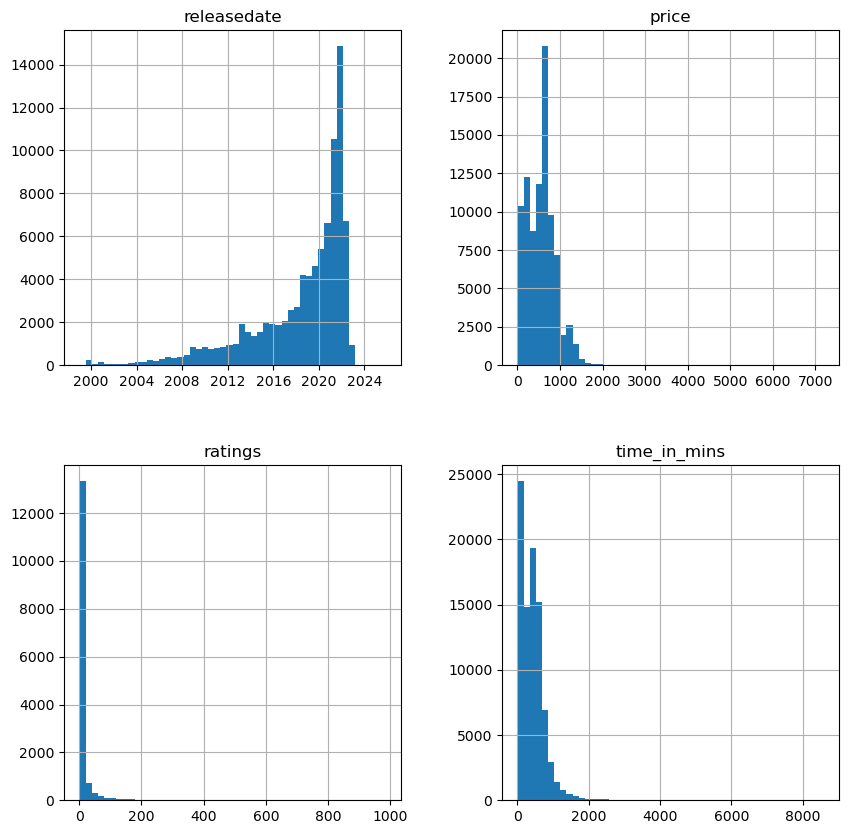

,price,ratings,time_in_mins
count,87489.000000,15072.000000,87489.000000
mean,559.009246,15.509156,417.497663
std,336.096642,61.975221,364.559399
min,0.000000,1.000000,1.000000
25%,268.000000,1.000000,142.000000
50%,585.000000,2.000000,386.000000
75%,755.000000,7.000000,584.000000
max,7198.000000,985.000000,8595.000000


In [50]:
#check data range using histogram
audible.hist(figsize=(10,10), bins=50)
plt.show()
audible.describe()

In [51]:
# Inspect the language 
audible.language.unique()

# Update capitalization 
audible['language'] = audible.language.str.capitalize()
audible.language.unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [52]:
# check duplicate rows
audible.duplicated().sum()


0

In [53]:
subset_cols = ['name', 'author', 'narrator', 'time_in_mins', 'price']
audible.duplicated(subset=subset_cols).sum()

70

In [54]:
# Check the duplicated rows keeping the duplicates and order by the name column
audible[audible.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')
# Drop duplicated rows keeping the last release date
audible.drop_duplicates(subset=subset_cols, keep='last', inplace=True)
# Check again for duplicates using our subset of columns
audible.duplicated(subset=subset_cols).sum()


0

In [55]:
# Save the dataframe to a new file: 'audible_clean.csv'
audible.to_csv('audible_clean.csv', index=False)